## imports and paths

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
_pth = 'data/saleprice_dataset.csv'
_cols = ['Advertised_Date', 'Sold_Date', 'Sale_Price', 'Odometer',
         'Power', 'Fuel_Urban', 'Make_Code', 'Family_Code', 'Year_Group',
         'Region_Description', 'Vehicle_Code']

raw_sale = pd.read_csv(_pth, usecols=range(1,12))

In [3]:
raw_sale.head(2)

,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
0,2020-06-24 00:00:00,2020-07-23,46935.54,7756.0,213.0,13.5,JEEP,GRAND,2019,WA,4126136366665310352
1,2019-11-21 00:00:00,2020-01-13,60556.34,2200.0,184.0,9.3,JEEP,GRAND,2019,WA,4976226188052338111


## Summary Stats

In [4]:
raw_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122595 entries, 0 to 122594
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Advertised_Date     122595 non-null  object 
 1   Sold_Date           122595 non-null  object 
 2   Sale_Price          122595 non-null  float64
 3   Odometer            122563 non-null  float64
 4   Power               122516 non-null  float64
 5   Fuel_Urban          108789 non-null  float64
 6   Make_Code           122595 non-null  object 
 7   Family_Code         122595 non-null  object 
 8   Year_Group          122595 non-null  int64  
 9   Region_Description  122595 non-null  object 
 10  Vehicle_Code        122595 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 10.3+ MB


In [5]:
raw_sale.describe().round() #stat summary

,Sale_Price,Odometer,Power,Fuel_Urban,Year_Group,Vehicle_Code
count,122595.0,122563.0,122516.0,108789.0,122595.0,1.225950e+05
mean,24603.0,81177.0,140.0,10.0,2015.0,5.527551e+16
std,18363.0,58879.0,51.0,3.0,4.0,5.311129e+18
min,91.0,0.0,28.0,1.0,1996.0,-9.222430e+18
25%,13497.0,38277.0,110.0,8.0,2013.0,-4.530959e+18
50%,20573.0,71759.0,129.0,10.0,2015.0,1.060213e+17
75%,30900.0,112554.0,147.0,11.0,2017.0,4.637276e+18
max,694545.0,4000380.0,545.0,26.0,2021.0,9.222305e+18


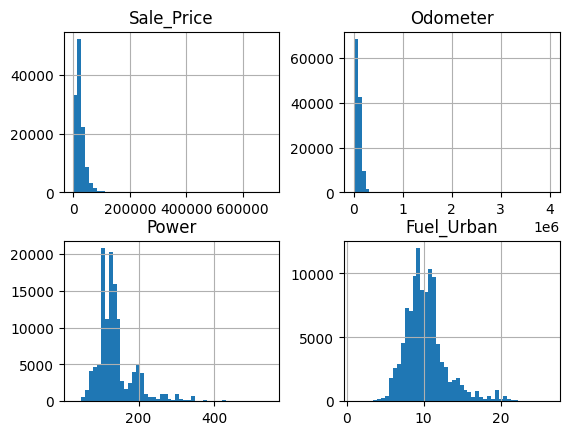

In [6]:
raw_sale.select_dtypes('float').hist(bins=50) # might have to lof-tranform sale_price and odometer
plt.show()

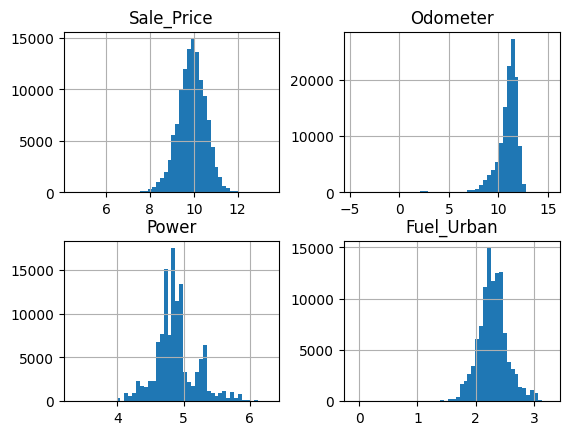

In [7]:
raw_sale.select_dtypes('float').applymap(lambda x: np.log(x+1e-2)).hist(bins=50) # might have to log-tranform some features
plt.show()

## EDA Individual Columns

### Year_Group

In [8]:
raw_sale.Year_Group.value_counts().sort_index().plot.bar(figsize=(5,2)) #how many records per `Year_Group`? What is year_group: perhaps make of model)?

<AxesSubplot:>

In [9]:
# how many years of sales data is there?
raw_sale.Sold_Date.str[:4].unique()

array(['2020', '2019', '2021', '2022', '2018'], dtype=object)

### Fuel & Power

In [10]:
raw_sale.plot.scatter(x='Power',y='Fuel_Urban', loglog=True, alpha=0.1) # how does fuel change with power, probably create a relashionship to impute fuel_urban

<AxesSubplot:xlabel='Power', ylabel='Fuel_Urban'>

In [11]:
raw_sale.plot.scatter(x='Sale_Price',y='Fuel_Urban', logx=True, alpha=0.1) # Does Fuel_Urban influence Sale_Price?

<AxesSubplot:xlabel='Sale_Price', ylabel='Fuel_Urban'>

### Vehicle Code

In [12]:
print(f'{60718/raw_sale.shape[0]*100:2.4f}% suspicious Vehicle_Code ')
raw_sale.query('Vehicle_Code<=0') # unusual vehicle codes, VIN # might have to be cleaned

49.5273% suspicious Vehicle_Code 


,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
2,2019-08-21 00:00:00,2019-10-15,39970.00,38674.0,184.0,9.3,JEEP,GRAND,2017,WA,-5679626332524971677
6,2019-08-03 00:00:00,2019-09-06,31816.36,85185.0,143.0,11.2,FORD,EVEREST,2015,WA,-7358387605770757153
7,2020-01-15 00:00:00,2020-02-21,44545.45,48510.0,213.0,13.5,JEEP,GRAND,2018,WA,-8921023106021724713
8,2019-05-24 00:00:00,2019-06-25,47788.57,2912.0,184.0,9.3,JEEP,GRAND,2018,WA,-8802551192911824092
9,2019-09-19 00:00:00,2019-10-16,36363.64,2008.0,209.0,16.6,JEEP,WRANGLE,2018,WA,-8488957666606336651
...,...,...,...,...,...,...,...,...,...,...,...
122578,2020-01-14 00:00:00,2020-04-06,18172.73,110208.0,150.0,6.3,MERC,CCLASS,2013,QLD,-5817223168853748200
122581,2020-01-23 00:00:00,2020-02-07,14436.36,58151.0,118.0,8.7,VOLK,TIGUAN,2012,QLD,-6978909278333027416
122582,2020-03-18 00:00:00,2020-03-31,13627.27,31023.0,103.0,8.5,TOYO,COROLLA,2015,QLD,-8023875955904102271
122584,2020-02-15 00:00:00,2020-04-16,9081.82,184801.0,123.0,11.5,SUBA,OUTBACK,2012,QLD,-102687443349852300


### Advertised_Date

In [13]:
print(f'{5322/raw_sale.shape[0]*100:2.4f}% missing adv_date ')
bad_adv = raw_sale.loc[raw_sale.Advertised_Date.str[:4].isin(['1967','0001']),:] # columns with adv date missing/suspicious
bad_adv.describe().round()

4.3411% missing adv_date 


,Sale_Price,Odometer,Power,Fuel_Urban,Year_Group,Vehicle_Code
count,5322.0,5322.0,5320.0,4552.0,5322.0,5.322000e+03
mean,20812.0,82309.0,133.0,10.0,2014.0,1.864772e+16
std,20450.0,64561.0,47.0,3.0,4.0,5.251077e+18
min,91.0,0.0,47.0,4.0,1996.0,-9.217972e+18
25%,10276.0,34305.0,108.0,9.0,2011.0,-4.487414e+18
50%,17322.0,71530.0,125.0,10.0,2015.0,1.230012e+17
75%,26343.0,116558.0,147.0,11.0,2017.0,4.522102e+18
max,590818.0,1114599.0,545.0,24.0,2021.0,9.217722e+18


In [14]:
((bad_adv.describe())*100/(raw_sale.describe()+0.01)).round(1) # how is this slice of data different from population ?

,Sale_Price,Odometer,Power,Fuel_Urban,Year_Group,Vehicle_Code
count,4.3,4.3,4.3,4.2,4.3,4.3
mean,84.6,101.4,95.4,99.0,100.0,33.7
std,111.4,109.7,92.3,92.4,120.8,98.9
min,100.0,0.0,167.8,428.6,100.0,100.0
25%,76.1,89.6,98.2,101.1,99.9,99.0
50%,84.2,99.7,96.9,99.9,100.0,116.0
75%,85.3,103.6,100.0,99.0,100.0,97.5
max,85.1,27.9,100.0,91.3,100.0,100.0


In [15]:
print(f'# of unique adv years: {raw_sale.Advertised_Date.str[:4].nunique() }')
raw_sale.Advertised_Date.str[:4].unique() # what are the adv years?

# of unique adv years: 11


array(['2020', '2019', '2021', '2022', '0001', '2018', '2017', '2015',
       '1967', '2014', '2016'], dtype=object)

In [16]:
raw_sale.Advertised_Date.str[:4].value_counts().sort_index().plot.bar(figsize=(5,3)) # have to remove dates before 2014

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1534: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim((start_edge, end_edge))


<AxesSubplot:xlabel='Sale_Price', ylabel='Fuel_Urban'>

In [17]:
# is adv_year/sold_year greater than or equal to Year_Group?
_fltr = raw_sale.Advertised_Date.str[:4].astype(int)>=2014
raw_sale.loc[_fltr,:].apply(lambda x: int(x.Advertised_Date[:4])-x.Year_Group, axis=1).describe() 
# on avg, adv_year is 5yrs after year_group
# year_group is the year of manufacture

count    117273.000000
mean          5.507244
std           3.563808
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          26.000000
dtype: float64

In [18]:
raw_sale.loc[_fltr,:].apply(lambda x: int(x.Sold_Date[:4])-x.Year_Group, axis=1).describe() # on avg, sold_year is 5yrs after year_group

count    117273.000000
mean          5.604513
std           3.554248
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          26.000000
dtype: float64

In [19]:
# what is the avg time(years) to sell after advertising?
fltr2 = raw_sale.loc[_fltr,:].apply(lambda x: int(x.Sold_Date[:4])<int(x.Advertised_Date[:4]), axis=1)

In [20]:
raw_sale.loc[_fltr&fltr2,:] # anomalies with sold_date>adv_date should be removed.

,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Vehicle_Code
46318,2019-02-11 00:00:00,2018-02-26,15000.00,27927.0,115.0,11.1,JEEP,COMPASS,2014,NSW,7306947965930081220
48353,2019-01-31 00:00:00,2018-04-10,28172.73,79268.0,201.0,14.4,TOYO,KLUGER,2014,NSW,-3923119754653825188
49056,2020-01-28 00:00:00,2019-02-08,15063.45,48353.0,120.0,10.1,HYUN,I30,2018,QLD,-2174965228717111753
49972,2019-01-25 00:00:00,2018-02-13,13679.18,21638.0,103.0,9.2,HYUN,ACCENT,2017,NSW,967886652041242463
50242,2019-03-30 00:00:00,2018-04-09,9545.45,152776.0,110.0,8.9,SUBA,IMPREZA,2013,NSW,8742765988022406397
60319,2019-06-24 00:00:00,2018-07-11,13527.27,30623.0,103.0,10.4,HOLD,TRAX,2015,NSW,1277478438555471479
74578,2021-02-02 00:00:00,2020-02-20,6309.83,194278.0,103.0,NaN,VOLK,GOLF,2007,QLD,-7818596660929839796
75132,2019-07-03 00:00:00,2018-10-18,23803.64,119787.0,317.0,22.4,HSV,MALOO,2010,WA,7249153235244440478
86958,2019-02-12 00:00:00,2018-03-07,11363.64,172421.0,110.0,8.9,SUBA,XV,2015,NSW,-5281860663756885406
96687,2019-09-16 00:00:00,2018-11-12,32097.18,34130.0,100.0,11.1,TOYO,HIACE,2016,NSW,3465306434023944833


In [21]:
# create a single filter with both conditions to filter data
_fltr3 = _fltr&~fltr2

In [22]:
raw_sale.loc[_fltr3].shape[0]/raw_sale.shape[0]

0.9564908846200906

### Region_Description

In [23]:
raw_sale.loc[_fltr3,:].Region_Description.value_counts()#.plot.bar(figsize=(4,2)) # looks like most sales are in WA

WA     34146
NSW    29498
QLD    17952
SA     16632
VIC    11406
TAS     7095
NZ       532
Name: Region_Description, dtype: int64

In [24]:
# how does sale_price vary with region ?
raw_sale.loc[_fltr3,:].groupby('Region_Description')['Sale_Price'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Region_Description,,,,,,,,
NSW,29498.0,22264.0,15326.0,182.0,12473.0,18490.0,27273.0,397723.0
NZ,532.0,36208.0,16444.0,4348.0,24120.0,33457.0,46116.0,116251.0
QLD,17952.0,25522.0,17488.0,291.0,14830.0,21636.0,31578.0,307536.0
SA,16632.0,24929.0,17169.0,1364.0,14423.0,21685.0,31082.0,468182.0
TAS,7095.0,15939.0,11080.0,1342.0,8173.0,12723.0,21364.0,119086.0
VIC,11406.0,29120.0,18689.0,182.0,16093.0,23955.0,37912.0,212545.0
WA,34146.0,26687.0,21342.0,1455.0,14453.0,21818.0,33026.0,694545.0


In [25]:
# how does odometer vary with region ?
raw_sale.loc[_fltr3,:].groupby('Region_Description')[['Odometer']].describe().round() # unusually low odometer reading for NZ (low sample size)

Odometer                                              \
                      count      mean      std   min      25%       50%   
Region_Description                                                        
NSW                 29497.0   86555.0  62473.0   0.0  44220.0   75192.0   
NZ                    531.0   55350.0  38804.0  15.0  24250.0   49000.0   
QLD                 17948.0   78459.0  56039.0   0.0  36711.0   69552.0   
SA                  16622.0   74602.0  50339.0   1.0  38442.0   68724.0   
TAS                  7084.0  117097.0  73631.0   0.0  59000.0  108904.0   
VIC                 11406.0   63249.0  48775.0   0.0  22624.0   55004.0   
WA                  34141.0   79914.0  56188.0   0.0  36403.0   72843.0   

                                         
                         75%        max  
Region_Description                       
NSW                 117791.0  4000380.0  
NZ                   78000.0   234506.0  
QLD                 109593.0   489924.0  
SA                  102111.0  1371376.0  
TAS                 165448.0   597079.0  
VIC                  92850.0   397000.0  
WA                  112545.0   475000.0

### Odometer

In [26]:
# does odometer reading influence sale_price
raw_sale.loc[_fltr3,:].plot.scatter(x='Odometer',y='Sale_Price',loglog=True ,alpha=0.1) 
# seems like sudden drop in sale price after a threshold of odometer, non-linear models

<AxesSubplot:xlabel='Odometer', ylabel='Sale_Price'>

In [27]:
raw_sale.loc[_fltr3,:].plot.scatter(y='Odometer',x='Year_Group',logy=True, alpha=0.1)
# non-linear interaction of odometer and make_year

<AxesSubplot:xlabel='Year_Group', ylabel='Odometer'>

In [60]:
# does km/year influence sale_price ?
sale_table = raw_sale.loc[_fltr3,:].copy()
sale_table = sale_table.assign(
    adv_date = pd.to_datetime(sale_table.Advertised_Date),
    sld_date = pd.to_datetime(sale_table.Sold_Date),
    make_date = pd.to_datetime(sale_table.Year_Group, format='%Y'), # make_date is approx to year start for age calc

)
sale_table = sale_table.assign(
    inventory_days=(sale_table.sld_date-sale_table.adv_date).dt.days,
    age_list_day=(sale_table.adv_date-sale_table.make_date).dt.days,
    age_sell_day=(sale_table.sld_date-sale_table.make_date).dt.days,
    sld_wknum = sale_table.sld_date.dt.isocalendar().week,
    adv_wknum = sale_table.adv_date.dt.isocalendar().week,
)
sale_table = sale_table.assign(
    km_per_day = (sale_table.Odometer/sale_table.age_sell_day),
    fuel_per_power = (sale_table.Fuel_Urban/sale_table.Power),
    odo_per_fuel = (sale_table.Odometer/sale_table.Fuel_Urban),
    odo_per_power = (sale_table.Odometer/sale_table.Power),
    pow_times_odo = (sale_table.Odometer*sale_table.Power),
)
sale_table.head(2)

,Advertised_Date,Sold_Date,Sale_Price,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,...,inventory_days,age_list_day,age_sell_day,sld_wknum,adv_wknum,km_per_day,fuel_per_power,odo_per_fuel,odo_per_power,pow_times_odo
0,2020-06-24 00:00:00,2020-07-23,46935.54,7756.0,213.0,13.5,JEEP,GRAND,2019,WA,...,29,540,569,30,26,13.630931,0.063380,574.518519,36.413146,1652028.0
1,2019-11-21 00:00:00,2020-01-13,60556.34,2200.0,184.0,9.3,JEEP,GRAND,2019,WA,...,53,324,377,3,47,5.835544,0.050543,236.559140,11.956522,404800.0


In [61]:
sale_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117261 entries, 0 to 122594
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Advertised_Date     117261 non-null  object        
 1   Sold_Date           117261 non-null  object        
 2   Sale_Price          117261 non-null  float64       
 3   Odometer            117229 non-null  float64       
 4   Power               117184 non-null  float64       
 5   Fuel_Urban          104228 non-null  float64       
 6   Make_Code           117261 non-null  object        
 7   Family_Code         117261 non-null  object        
 8   Year_Group          117261 non-null  int64         
 9   Region_Description  117261 non-null  object        
 10  Vehicle_Code        117261 non-null  int64         
 11  adv_date            117261 non-null  datetime64[ns]
 12  sld_date            117261 non-null  datetime64[ns]
 13  make_date           117261 no

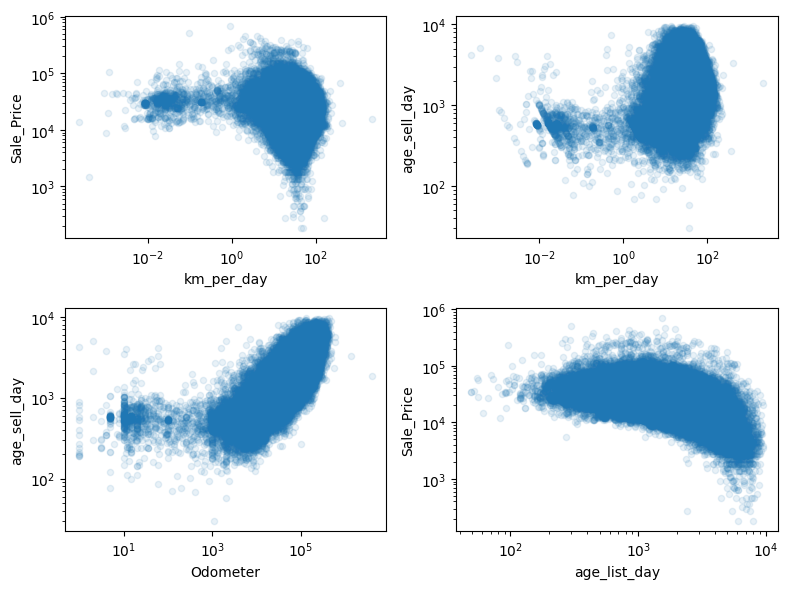

In [48]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
sale_table.plot.scatter(y='Sale_Price',x='km_per_day',loglog=True,alpha=0.1, ax=ax[0][0])
sale_table.plot.scatter(y='age_sell_day',x='km_per_day',loglog=True,alpha=0.1, ax=ax[0][1])
sale_table.plot.scatter(y='age_sell_day',x='Odometer',loglog=True,alpha=0.1, ax=ax[1][0])
sale_table.plot.scatter(y='Sale_Price',x='age_list_day',loglog=True,alpha=0.1, ax=ax[1][1])

plt.tight_layout()
plt.show()

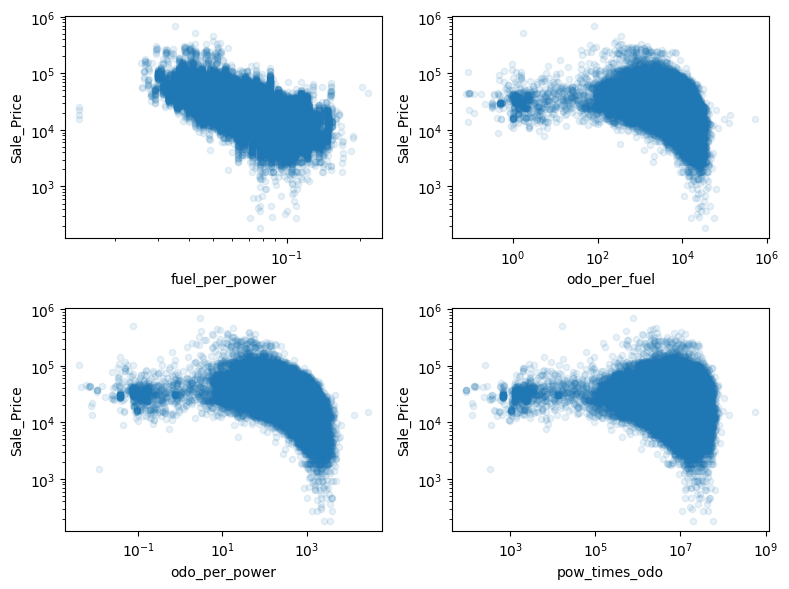

In [30]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
sale_table.plot.scatter(y='Sale_Price',x='fuel_per_power',loglog=True,alpha=0.1, ax=ax[0][0])
sale_table.plot.scatter(y='Sale_Price',x='odo_per_fuel',loglog=True,alpha=0.1, ax=ax[0][1])
sale_table.plot.scatter(y='Sale_Price',x='odo_per_power',loglog=True,alpha=0.1, ax=ax[1][0])
sale_table.plot.scatter(y='Sale_Price',x='pow_times_odo',loglog=True,alpha=0.1, ax=ax[1][1])
plt.tight_layout()
plt.show()

In [31]:
sale_table.select_dtypes('number').describe().round(4)

,Sale_Price,Odometer,Power,Fuel_Urban,Year_Group,Vehicle_Code,inventory_days,age_list_day,age_sell_day,km_per_day,fuel_per_power,odo_per_fuel,odo_per_power,pow_times_odo
count,117261.0000,1.172290e+05,117184.0000,104228.0000,117261.0000,1.172610e+05,117261.0000,117261.0000,117261.0000,117229.0000,104228.0000,104200.0000,117152.0000,1.171520e+05
mean,24776.3386,8.112319e+04,139.9439,10.2292,2014.5646,5.696914e+16,35.2567,2190.7650,2226.0216,36.3610,0.0769,7641.7547,645.5718,1.119418e+07
std,18244.6085,5.860545e+04,51.1845,2.7201,3.6089,5.313807e+18,38.2327,1295.6056,1292.0954,20.4295,0.0185,5624.1744,519.5230,9.010273e+06
min,181.8200,0.000000e+00,28.0000,0.9000,1996.0000,-9.222430e+18,-329.0000,49.0000,30.0000,0.0000,0.0143,0.0000,0.0000,0.000000e+00
25%,13624.5500,3.843400e+04,110.0000,8.5000,2013.0000,-4.534104e+18,14.0000,1255.0000,1287.0000,23.1766,0.0648,3701.1534,275.2544,4.767423e+06
50%,20786.3900,7.176400e+04,129.0000,9.8000,2015.0000,1.050011e+17,27.0000,1948.0000,1986.0000,33.9151,0.0762,6781.3380,539.1842,9.233037e+06
75%,30986.3600,1.123820e+05,147.0000,11.3000,2017.0000,4.646038e+18,46.0000,2900.0000,2937.0000,46.4058,0.0881,10504.9698,888.1231,1.530486e+07
max,694545.4500,4.000380e+06,545.0000,26.4000,2021.0000,9.222305e+18,2086.0000,9555.0000,9574.0000,2132.3987,0.2143,519529.8701,28371.4894,5.640536e+08


In [32]:
sale_pos_inv = sale_table.query('inventory_days>0') #.inventory_days.describe() #negative inventory days removed
print(f'% of rows included: {100*sale_pos_inv.shape[0]/raw_sale.shape[0]:2.4f}')

% of rows included: 95.1434


### Make_code

In [33]:
sale_pos_inv.Make_Code.nunique(), sale_pos_inv.Make_Code.unique()

(63,
 array(['JEEP', 'FORD', 'SUBA', 'KIA', 'TOYO', 'VOLK', 'MITS', 'MAZD',
        'HOND', 'SUZU', 'NISS', 'MERC', 'PORS', 'LAND', 'AUDI', 'HYUN',
        'JAGU', 'HOLD', 'BMW', 'SKOD', 'MINI', 'MASE', 'DODG', 'HSV',
        'LEXU', 'GREA', 'FIAT', 'VOLV', 'LDV', 'CHRY', 'BENT', 'RENA',
        'ISUZ', 'MG', 'FPV', 'ALFA', 'OPEL', 'PROT', 'PEUG', 'ASTO',
        'FOTO', 'FERR', 'RAM', 'ABAR', 'HUMM', 'INFI', 'CHEV', 'TESL',
        'SSAN', 'CITR', 'TRD', 'LOTU', 'DAIH', 'SAAB', 'HAVA', 'SMAR',
        'CHER', 'MAHI', 'DAEW', 'TATA', 'GENE', 'JMC', 'MORG'],
       dtype=object))

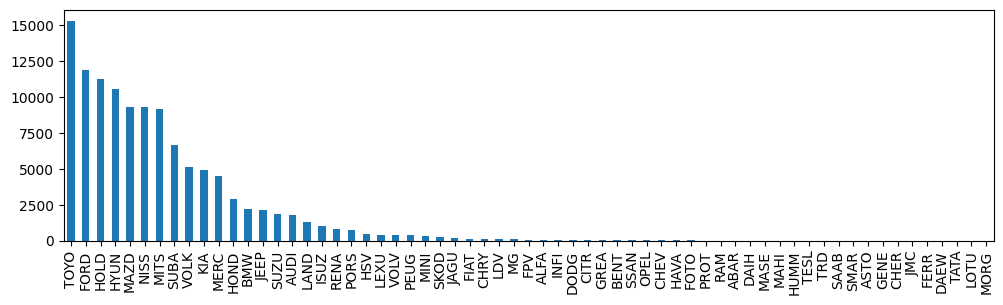

In [34]:
# popular make is toyota,ford,holdn,hyundai
sale_pos_inv.Make_Code.value_counts().plot.bar(figsize=(12,3))
plt.show()

In [35]:
sale_pos_inv.groupby('Make_Code')['Fuel_Urban'].mean().sort_values(ascending=False).head()

Make_Code
ASTO    21.800000
HSV     20.757692
FPV     19.748485
BENT    18.597143
CHEV    17.500000
Name: Fuel_Urban, dtype: float64

In [36]:
sale_pos_inv.groupby('Make_Code')['Fuel_Urban'].mean().sort_values(ascending=True).head()

Make_Code
SMAR    5.800000
SKOD    7.645756
DAIH    7.720000
MINI    7.732537
CITR    7.785294
Name: Fuel_Urban, dtype: float64

### Family_Code

In [37]:
sale_pos_inv.Family_Code.nunique(), sale_pos_inv.Family_Code.unique()

(592,
 array(['GRAND', 'CHEROKE', 'FOCUS', 'EVEREST', 'WRANGLE', 'COMPASS',
        'OUTBACK', 'FORESTE', 'LIBERTY', 'MUSTANG', 'CERATO', 'LANDCRU',
        'SPORTAG', 'XV', 'GOLF', 'WRX', 'IMPREZA', 'PSPORT', 'CX-5',
        'OUTLAND', 'LEVORG', 'HRV', 'RANGER', 'SWIFT', 'RIO', 'ASX',
        'KLUGER', 'POLO', 'NAVARA', 'ACLASS', 'CAYMAN', 'DISCOVE', 'Q2',
        'KUGA', 'TUCSON', 'CAYENNE', 'MACAN', '718', '911', 'BOXSTER',
        'XF', 'FIESTA', 'ENDURA', 'TRANSTC', 'FALCONU', 'ESCAPE', 'CRUZE',
        'MONDEO', 'MIRAGE', 'BCLASS', 'I30', 'PANAMER', 'RANGE E', 'X5',
        'JIMNY', 'CALAIS', '86', 'COMMODO', 'KONA', '3SERIES', 'JAZZ',
        'PRADO', 'BARINA', 'BRZ', 'QASHQAI', '2SERIES', 'X1', 'TRITON',
        'HILUX', 'OCTAVIA', 'CX3', 'M2', 'GLACLAS', 'HATCH', 'TERRITO',
        'COLORAD', 'X-TRAIL', 'PAJERO', 'SQ5', 'GHIBLI', 'PICANTO',
        'AURION', 'SANTA F', '3', 'I40', 'NITRO', 'RAV4', 'RS3', 'CLUBSPO',
        'A1', 'TOUAREG', 'SORENTO', 'CAMRY', 'X4', 'X2', 'MX5'

In [38]:
sale_pos_inv.Family_Code.value_counts()[:100].plot.bar(figsize=(14,3))

<AxesSubplot:>

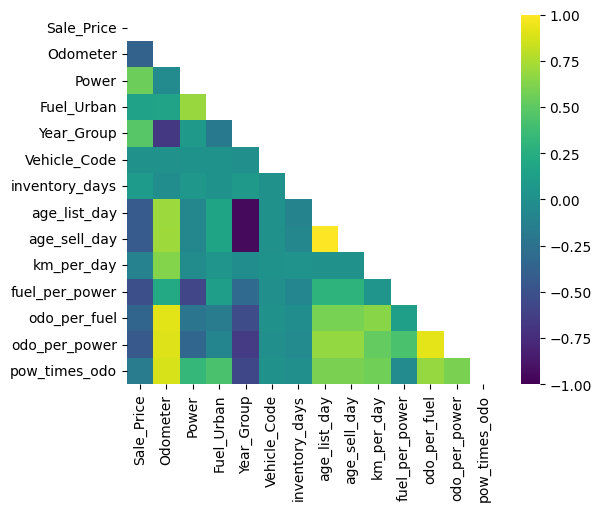

In [49]:
corr = sale_pos_inv.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,square=True, vmin=-1, vmax=1,center=0, cmap='viridis')
plt.show()

In [40]:
sale_pos_inv.columns

Index(['Advertised_Date', 'Sold_Date', 'Sale_Price', 'Odometer', 'Power',
       'Fuel_Urban', 'Make_Code', 'Family_Code', 'Year_Group',
       'Region_Description', 'Vehicle_Code', 'adv_date', 'sld_date',
       'make_date', 'inventory_days', 'age_list_day', 'age_sell_day',
       'km_per_day', 'fuel_per_power', 'odo_per_fuel', 'odo_per_power',
       'pow_times_odo'],
      dtype='object')

In [41]:
cols_sel = ['adv_date', 'sld_date', 'make_date', 'Sale_Price', 'Odometer', 'Power',
            'Fuel_Urban', 'Make_Code', 'Family_Code', 'Region_Description', 
            'Vehicle_Code', 'inventory_days', 'age_list_day', 'age_sell_day',
            'km_per_day', 'fuel_per_power', 'odo_per_fuel', 'odo_per_power','pow_times_odo'
           ]

all_df = sale_pos_inv.loc[:,cols_sel]
all_df.to_csv('./data/sales.csv', index=False)

In [42]:
splt_idx = int(all_df.shape[0] * .85)
splt_idx

99144

In [43]:
train = all_df.sort_values('sld_date').iloc[:splt_idx,:]
test = all_df.sort_values('sld_date').iloc[splt_idx:,:]

In [44]:
train.shape, test.shape

((99144, 19), (17497, 19))

In [45]:
max_dt_train, max_dt_test = train.sld_date.max().strftime('%Y-%m-%d'), test.sld_date.max().strftime('%Y-%m-%d')
max_dt_train, max_dt_test

('2021-12-24', '2022-08-08')

In [46]:
train.to_csv(f'./data/train_{max_dt_train}.csv', index=False)
test.to_csv(f'./data/test_{max_dt_test}.csv', index=False)